In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from scipy.stats import kstest, shapiro 
import statsmodels.api as sm
import scipy.stats as stats

plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [160]:
# read dataframe
df = pd.read_csv('8_hw_dataset.csv')

In [161]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1460 - строк и 81 - столбец, распределение по типу данных float64(3), int64(35), object(43). Присутствуют пропуски данных в столбцах: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType1, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

In [163]:
#look at statistics

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [164]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


<AxesSubplot:>

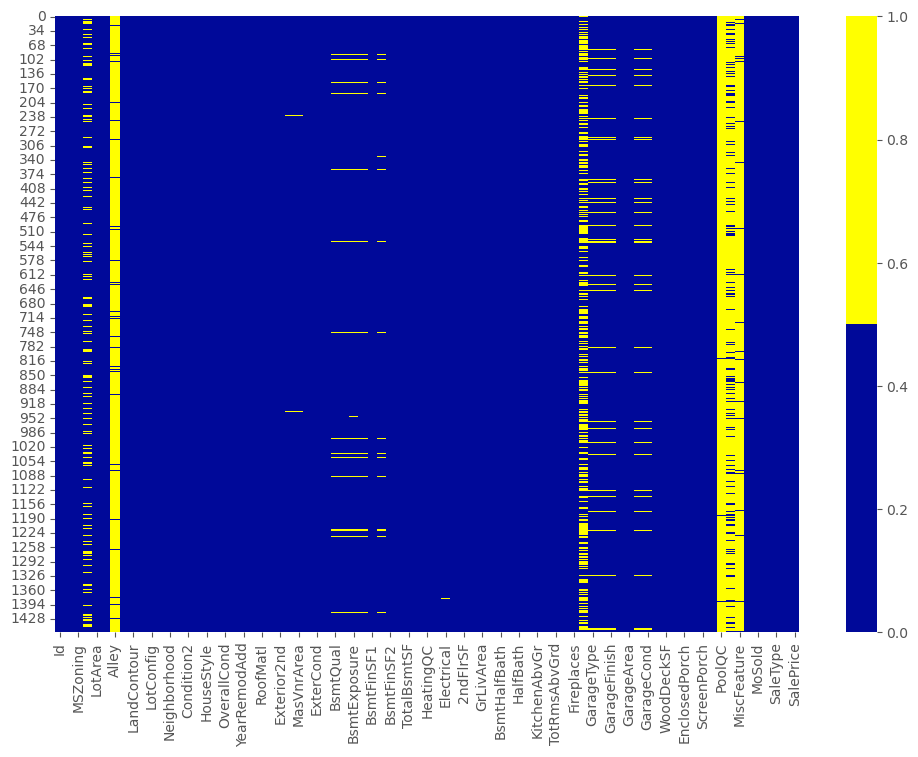

In [165]:
# create heatmap to analyse missing values

cols = df.columns[:80]
colours = ['#000999','#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [166]:
# look at missing values
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100)))

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 18%
LotArea - 0%
Street - 0%
Alley - 94%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 47%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageCars - 0%
GarageArea - 0%
GarageQu

In [167]:
# drop columns where missing values
# LotFrontage - 18% Linear feet of street connected to property
# Alley - 94% Type of alley access
# FireplaceQu - 47% Fireplace quality
# PoolQC - 100% Pool quality
# Fence - 81%
# MiscFeature - 96% Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature

df_1 = df.drop(['LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'MiscVal', 'Fence'], axis='columns')

In [168]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [169]:
# make low registr
df_1 = df_1.applymap(lambda x: x.lower() if type(x) == str else x)

In [170]:
#find duplicates 
duplicates = df_1[df_1.duplicated()]
duplicates

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicates. To delete duplicates use dataframe.drop_duplicates()

In [171]:
# fill null "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
# "GarageFinish", "GarageQual", "GarageCond"- mode column

mode_MasVnrType = df_1["MasVnrType"].mode()[0]
df_1["MasVnrType"] = df_1["MasVnrType"].fillna(mode_MasVnrType)

mode_MasVnrArea = df_1["MasVnrArea"].mode()[0]
df_1["MasVnrArea"] = df_1["MasVnrArea"].fillna(mode_MasVnrArea)

mode_BsmtQual = df_1["BsmtQual"].mode()[0]
df_1["BsmtQual"] = df_1["BsmtQual"].fillna(mode_BsmtQual)

mode_BsmtCond = df_1["BsmtCond"].mode()[0]
df_1["BsmtCond"] = df_1["BsmtCond"].fillna(mode_BsmtCond)

mode_BsmtExposure= df_1["BsmtExposure"].mode()[0]
df_1["BsmtExposure"] = df_1["BsmtExposure"].fillna(mode_BsmtExposure)

mode_BsmtFinType1= df_1["BsmtFinType1"].mode()[0]
df_1["BsmtFinType1"] = df_1["BsmtFinType1"].fillna(mode_BsmtFinType1)

mode_BsmtFinType2= df_1["BsmtFinType2"].mode()[0]
df_1["BsmtFinType2"] = df_1["BsmtFinType2"].fillna(mode_BsmtFinType2)

mode_GarageType= df_1["GarageType"].mode()[0]
df_1["GarageType"] = df_1["GarageType"].fillna(mode_GarageType)

mode_GarageFinish= df_1["GarageFinish"].mode()[0]
df_1["GarageFinish"] = df_1["GarageFinish"].fillna(mode_GarageFinish)

mode_GarageQual= df_1["GarageQual"].mode()[0]
df_1["GarageQual"] = df_1["GarageQual"].fillna(mode_GarageQual)

mode_GarageCond= df_1["GarageCond"].mode()[0]
df_1["GarageCond"] = df_1["GarageCond"].fillna(mode_GarageCond)

In [172]:
# fill null "GarageYrBlt" = "YearBuilt"
df_1["GarageYrBlt"] = df_1["GarageYrBlt"].fillna(df_1["YearBuilt"])

In [173]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

alternative method to replace missing values
numeric_cols = df.select_dtypes(include=[np.number])
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

categorical_cols = df.select_dtypes(include=['object'])
df[categorical_cols.columns] = categorical_cols.fillna(categorical_cols.mode()iloc[0])


In [182]:
#EDA
# check normal distribution "SalePrice"
kstest(df_1["SalePrice"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

statistic=1.0 , pvalue=0.0 < 0,05

samples are not drawn from a normal distribution

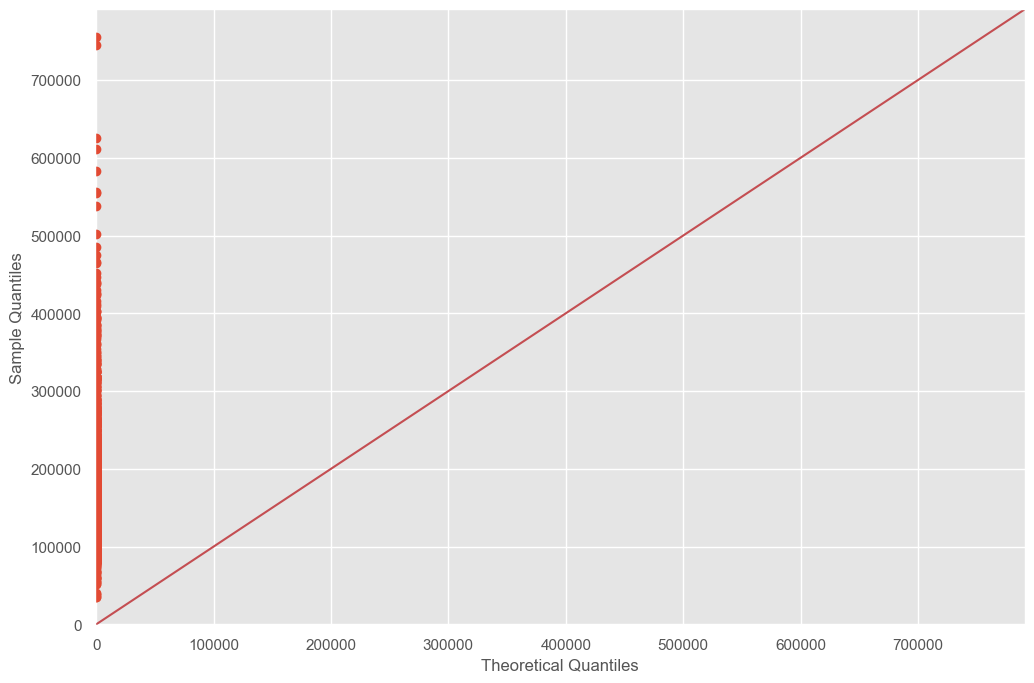

In [186]:
fig = sm. qqplot (df_1["SalePrice"], line='45')

plt.show()

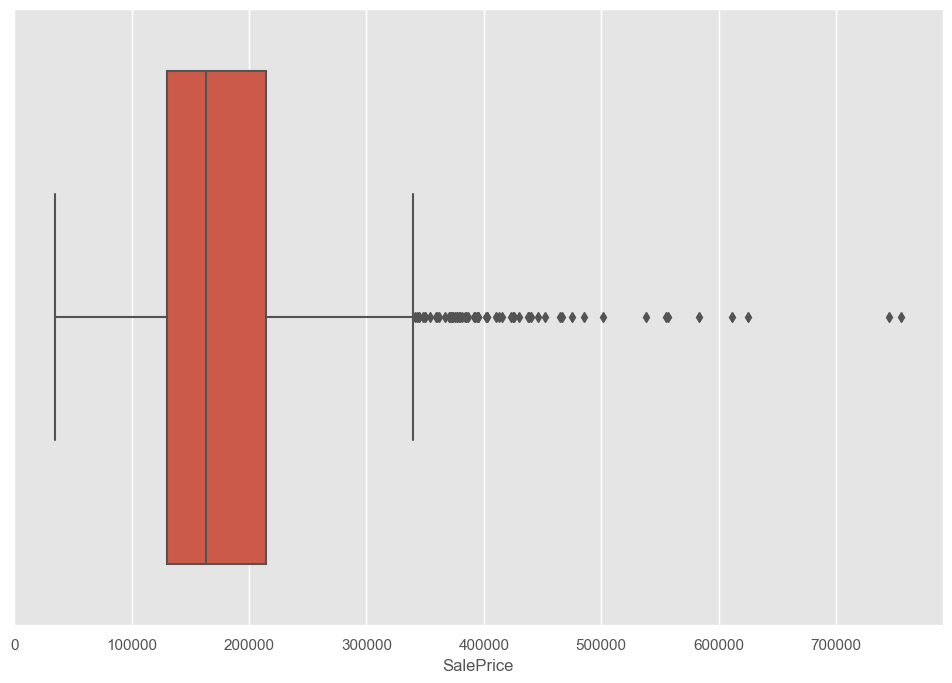

In [187]:
sns.boxplot(x=df_1["SalePrice"])
plt.show()

there are emissions after ~340000

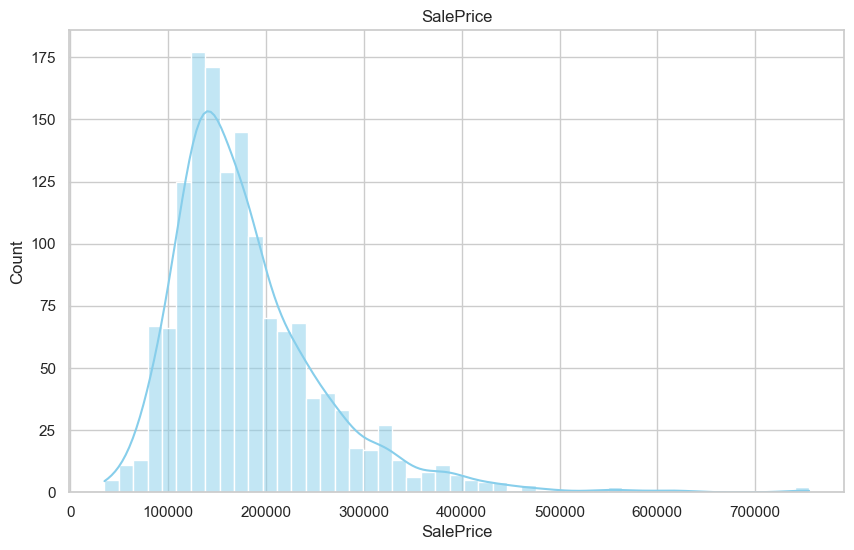

In [181]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_1["SalePrice"], kde=True, color="skyblue")
plt.title("SalePrice")
plt.show()

negativebinomial

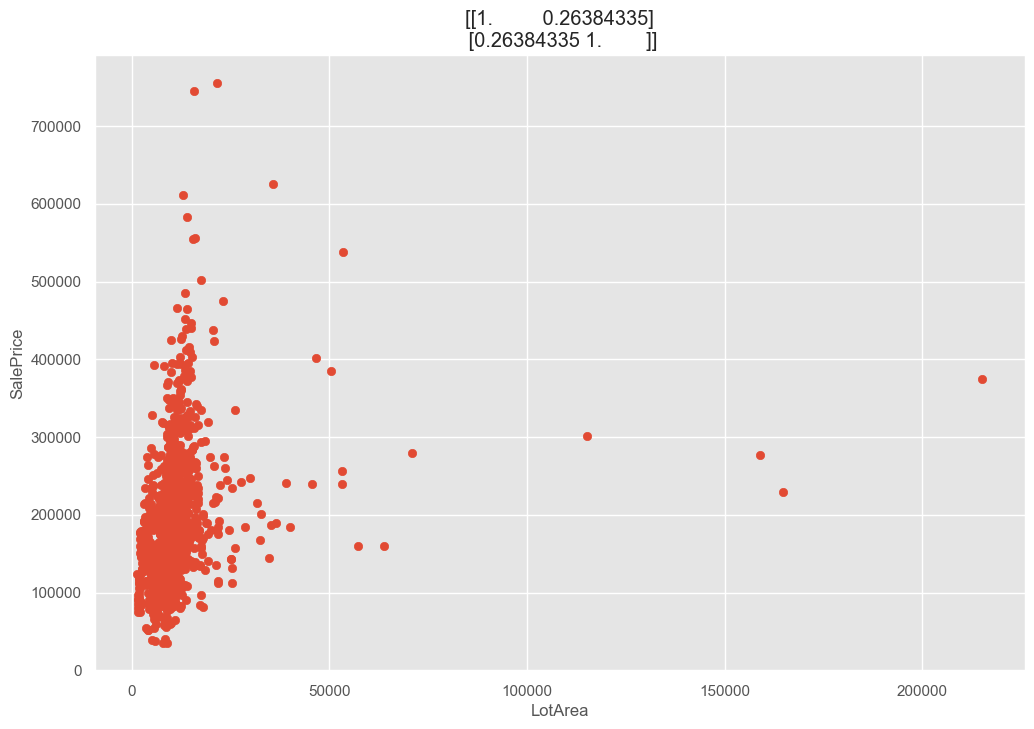

In [190]:
#correlation

#SalePrice and LotArea
r = np.corrcoef(df_1["LotArea"], df_1["SalePrice"])
plt.scatter(df_1["LotArea"], df_1["SalePrice"])
plt.title(r)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [193]:
stats.spearmanr(df_1["LotArea"], df_1["SalePrice"])

SpearmanrResult(correlation=0.4564605833912115, pvalue=4.8715809571702074e-76)

In [ ]:
moderate positive correlation

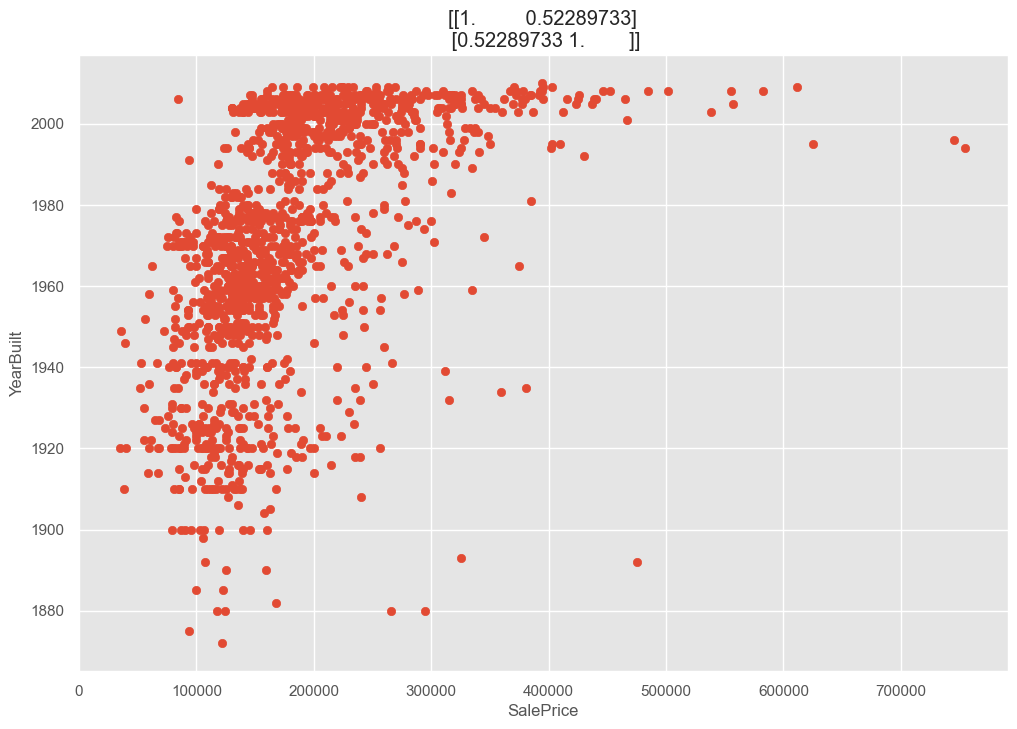

In [197]:
#SalePrice and YearBuilt
r = np.corrcoef(df_1["SalePrice"], df_1["YearBuilt"])
plt.scatter(df_1["SalePrice"], df_1["YearBuilt"])
plt.title(r)
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.show()

In [198]:
stats.spearmanr(df_1["SalePrice"], df_1["YearBuilt"])

SpearmanrResult(correlation=0.6526815462850586, pvalue=5.693840951687133e-178)

In [ ]:
moderate positive correlation

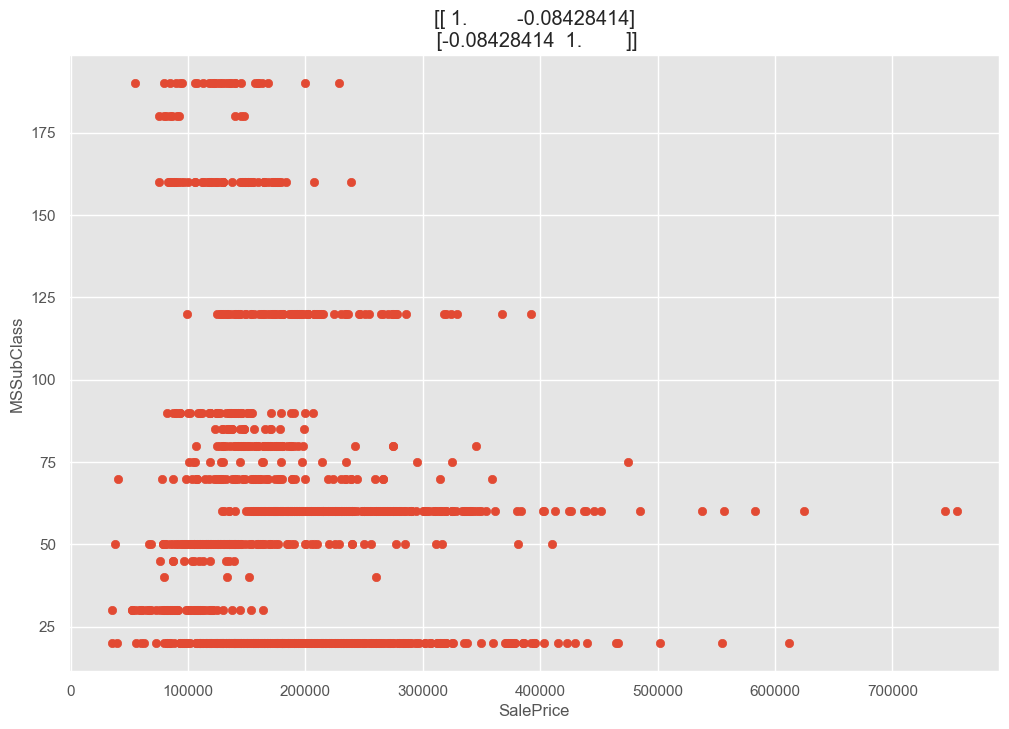

In [199]:
#SalePrice and YearBuilt
r = np.corrcoef(df_1["SalePrice"], df_1["MSSubClass"])
plt.scatter(df_1["SalePrice"], df_1["MSSubClass"])
plt.title(r)
plt.xlabel('SalePrice')
plt.ylabel('MSSubClass')
plt.show()

In [200]:
stats.spearmanr(df_1["SalePrice"], df_1["MSSubClass"])

SpearmanrResult(correlation=0.007192252911733475, pvalue=0.7836360376210691)

weak positive correlation

In [210]:
# one-hot encoding and label encoding


df_en = pd.get_dummies(df_1, columns=['LandSlope'])

In [211]:
df_en.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LandSlope_gtl,LandSlope_mod,LandSlope_sev
0,1,60,rl,8450,pave,reg,lvl,allpub,inside,collgcr,...,0,0,2,2008,wd,normal,208500,1,0,0
1,2,20,rl,9600,pave,reg,lvl,allpub,fr2,veenker,...,0,0,5,2007,wd,normal,181500,1,0,0
2,3,60,rl,11250,pave,ir1,lvl,allpub,inside,collgcr,...,0,0,9,2008,wd,normal,223500,1,0,0
3,4,70,rl,9550,pave,ir1,lvl,allpub,corner,crawfor,...,0,0,2,2006,wd,abnorml,140000,1,0,0
4,5,60,rl,14260,pave,ir1,lvl,allpub,fr2,noridge,...,0,0,12,2008,wd,normal,250000,1,0,0


In [218]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_en['ExterQual'] = le.fit_transform(df_en['ExterQual'].astype(str))
df_en.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LandSlope_gtl,LandSlope_mod,LandSlope_sev
0,1,60,rl,8450,pave,reg,lvl,allpub,inside,collgcr,...,0,0,2,2008,wd,normal,208500,1,0,0
1,2,20,rl,9600,pave,reg,lvl,allpub,fr2,veenker,...,0,0,5,2007,wd,normal,181500,1,0,0
2,3,60,rl,11250,pave,ir1,lvl,allpub,inside,collgcr,...,0,0,9,2008,wd,normal,223500,1,0,0
3,4,70,rl,9550,pave,ir1,lvl,allpub,corner,crawfor,...,0,0,2,2006,wd,abnorml,140000,1,0,0
4,5,60,rl,14260,pave,ir1,lvl,allpub,fr2,noridge,...,0,0,12,2008,wd,normal,250000,1,0,0
5,6,50,rl,14115,pave,ir1,lvl,allpub,inside,mitchel,...,0,0,10,2009,wd,normal,143000,1,0,0
6,7,20,rl,10084,pave,reg,lvl,allpub,inside,somerst,...,0,0,8,2007,wd,normal,307000,1,0,0
7,8,60,rl,10382,pave,ir1,lvl,allpub,corner,nwames,...,0,0,11,2009,wd,normal,200000,1,0,0
8,9,50,rm,6120,pave,reg,lvl,allpub,inside,oldtown,...,0,0,4,2008,wd,abnorml,129900,1,0,0
9,10,190,rl,7420,pave,reg,lvl,allpub,corner,brkside,...,0,0,1,2008,wd,normal,118000,1,0,0


In [219]:
#Z-score
z = np.abs(stats.zscore(df_en['SalePrice']))
threshold = 3
outliers = df_en['SalePrice'][z > threshold]
df_en.loc[z > threshold, 'SalePrice'] = df_en['SalePrice'].median()


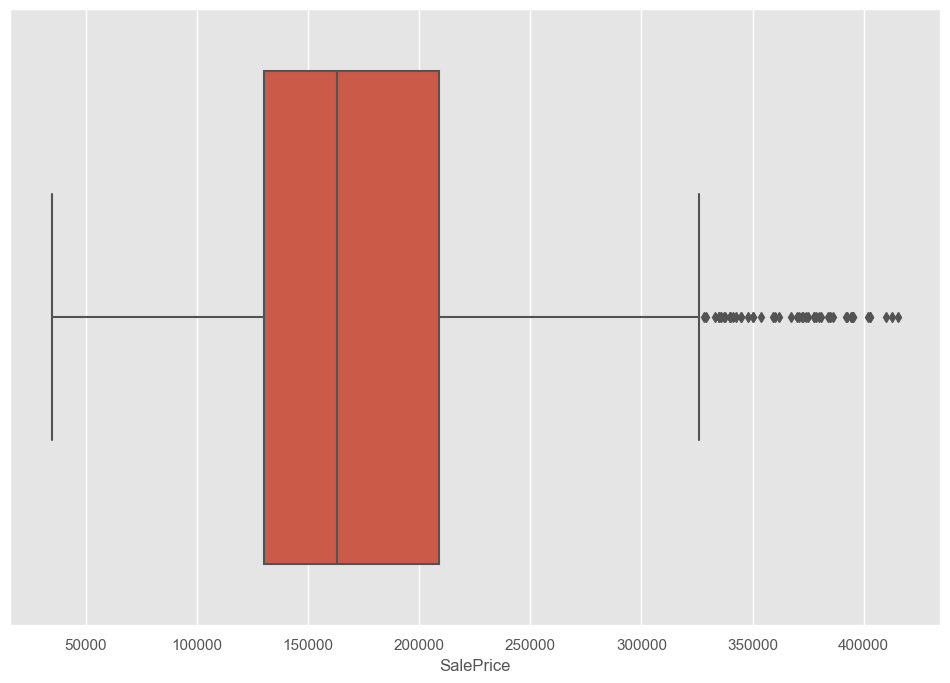

In [220]:
sns.boxplot(x=df_en["SalePrice"])
plt.show()

In [221]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [222]:
df_en.to_csv('cleaned_house_prices.csv',index=False)